In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [13]:
Train_data = pd.read_csv('Train_Orig_OH.csv')
Validation_data = pd.read_csv('Valid_Orig_OH.csv')
Test_data = pd.read_csv('Test_Orig_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12000 non-null  int64  
 1   AnnualIncome                    12000 non-null  int64  
 2   CreditScore                     12000 non-null  int64  
 3   Experience                      12000 non-null  int64  
 4   LoanAmount                      12000 non-null  int64  
 5   LoanDuration                    12000 non-null  int64  
 6   NumberOfDependents              12000 non-null  int64  
 7   MonthlyDebtPayments             12000 non-null  int64  
 8   CreditCardUtilizationRate       12000 non-null  float64
 9   NumberOfOpenCreditLines         12000 non-null  int64  
 10  NumberOfCreditInquiries         12000 non-null  int64  
 11  DebtToIncomeRatio               12000 non-null  float64
 12  BankruptcyHistory               

In [14]:
Train_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanApproved,RiskScore
0,57,47030,511,35,15823,24,2,404,0.363811,2,...,0,0,1,0,0,0,1,0,0,51.0
1,31,44704,587,6,42377,84,4,307,0.478811,2,...,0,0,0,0,1,0,0,0,0,50.0
2,40,86684,609,18,17768,36,4,513,0.159431,1,...,0,0,0,0,0,1,0,0,0,53.0
3,59,207724,666,36,19782,60,0,403,0.292295,2,...,0,0,0,1,0,0,0,0,1,33.6
4,32,54324,574,12,37298,48,1,541,0.187842,1,...,0,0,0,0,0,1,0,0,0,53.0


In [15]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [16]:
y_training.min()

0

In [17]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [18]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [19]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [20]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [21]:
print(y_training)

[0 0 0 ... 1 0 0]


In [22]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.714137
1  0.625555
2  0.583843
3  0.571433
4  0.564947
Validation Data
Confusion Matrix for hidden layer 8
[[2652  392]
 [ 223  733]]
Accuracy: 0.8462, Precision: 0.6516, Recall: 0.7667, F1-score: 0.7045

Test Data
Confusion Matrix for hiden layer 8
[[2649  395]
 [ 225  731]]
Accuracy: 0.8450, Precision: 0.6492, Recall: 0.7646, F1-score: 0.7022



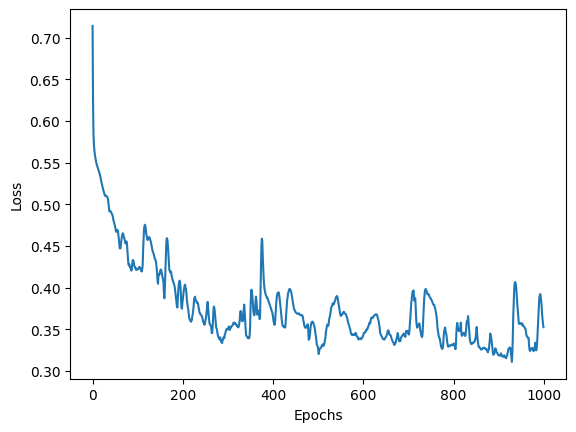

Training Losses are 
          0
0  0.673193
1  0.589629
2  0.549364
3  0.526143
4  0.513308
Validation Data
Confusion Matrix for hidden layer 16
[[2807  237]
 [ 339  617]]
Accuracy: 0.8560, Precision: 0.7225, Recall: 0.6454, F1-score: 0.6818

Test Data
Confusion Matrix for hiden layer 16
[[2804  240]
 [ 324  632]]
Accuracy: 0.8590, Precision: 0.7248, Recall: 0.6611, F1-score: 0.6915



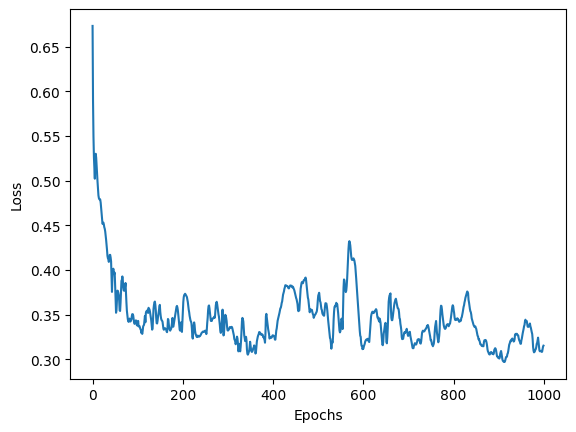

Training Losses are 
          0
0  0.615374
1  0.568076
2  0.529372
3  0.506180
4  0.496474
Validation Data
Confusion Matrix for hidden layer 32
[[2847  197]
 [ 414  542]]
Accuracy: 0.8472, Precision: 0.7334, Recall: 0.5669, F1-score: 0.6395

Test Data
Confusion Matrix for hiden layer 32
[[2832  212]
 [ 405  551]]
Accuracy: 0.8458, Precision: 0.7221, Recall: 0.5764, F1-score: 0.6411



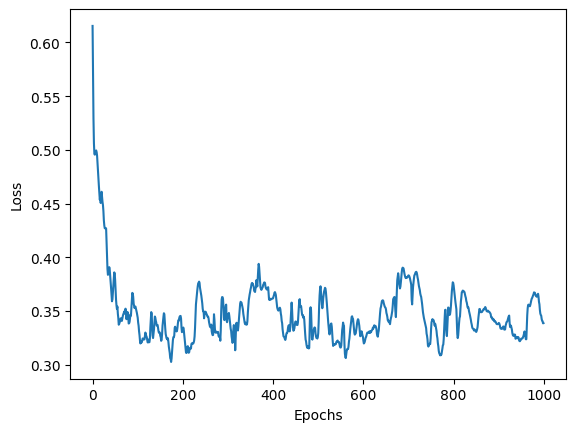

Training Losses are 
          0
0  0.896757
1  0.695557
2  0.584348
3  0.532869
4  0.517348
Validation Data
Confusion Matrix for hidden layer 64
[[2845  199]
 [ 402  554]]
Accuracy: 0.8498, Precision: 0.7357, Recall: 0.5795, F1-score: 0.6483

Test Data
Confusion Matrix for hiden layer 64
[[2836  208]
 [ 411  545]]
Accuracy: 0.8452, Precision: 0.7238, Recall: 0.5701, F1-score: 0.6378



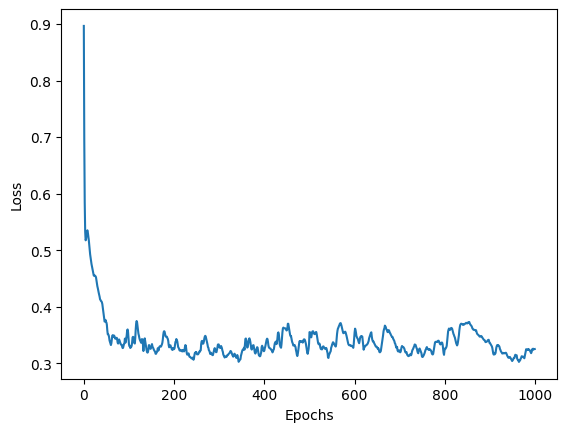

Training Losses are 
          0
0  0.593370
1  0.502725
2  0.508709
3  0.499776
4  0.475075
Validation Data
Confusion Matrix for hidden layer 128
[[2752  292]
 [ 255  701]]
Accuracy: 0.8632, Precision: 0.7059, Recall: 0.7333, F1-score: 0.7193

Test Data
Confusion Matrix for hiden layer 128
[[2753  291]
 [ 256  700]]
Accuracy: 0.8632, Precision: 0.7064, Recall: 0.7322, F1-score: 0.7191



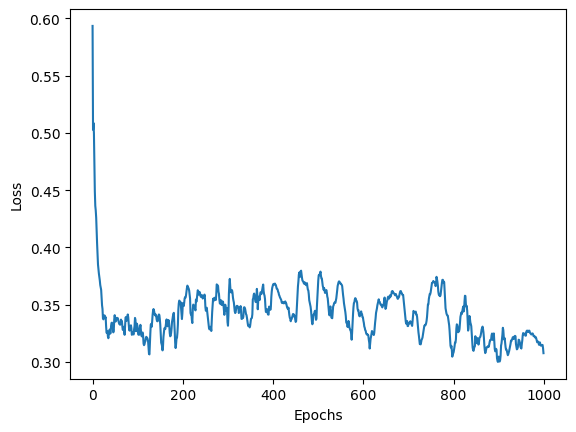

Best accuracy for test data is 0.86325 for degree 128


In [23]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(50,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

In [24]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.916803
1  0.913737
2  0.910729
3  0.907746
4  0.904739
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[2923  121]
 [ 422  534]]
Accuracy: 0.8642, Precision: 0.8153, Recall: 0.5586, F1-score: 0.6629

Test Data
Confusion Matrix for hiden layer 8 and 8
[[2931  113]
 [ 433  523]]
Accuracy: 0.8635, Precision: 0.8223, Recall: 0.5471, F1-score: 0.6570



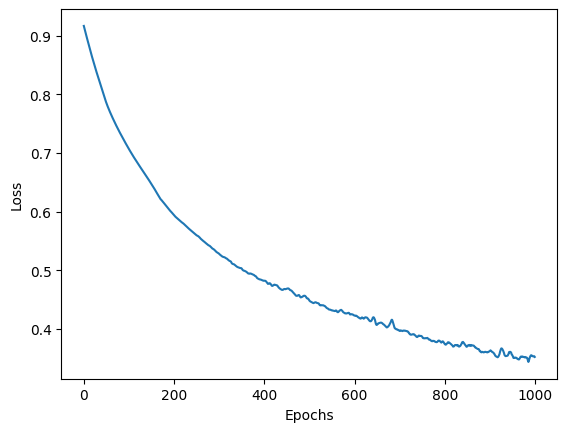

Training Losses are 
          0
0  0.634664
1  0.631987
2  0.629426
3  0.627049
4  0.624625
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2874  170]
 [ 377  579]]
Accuracy: 0.8632, Precision: 0.7730, Recall: 0.6056, F1-score: 0.6792

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2883  161]
 [ 392  564]]
Accuracy: 0.8618, Precision: 0.7779, Recall: 0.5900, F1-score: 0.6710



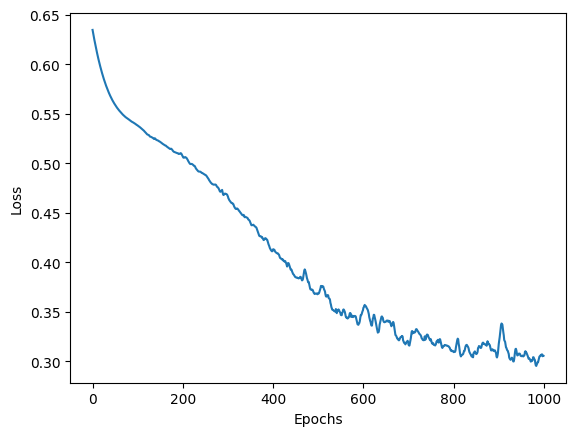

Training Losses are 
          0
0  0.649652
1  0.645082
2  0.640650
3  0.636349
4  0.632176
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2812  232]
 [ 319  637]]
Accuracy: 0.8622, Precision: 0.7330, Recall: 0.6663, F1-score: 0.6981

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2830  214]
 [ 279  677]]
Accuracy: 0.8768, Precision: 0.7598, Recall: 0.7082, F1-score: 0.7331



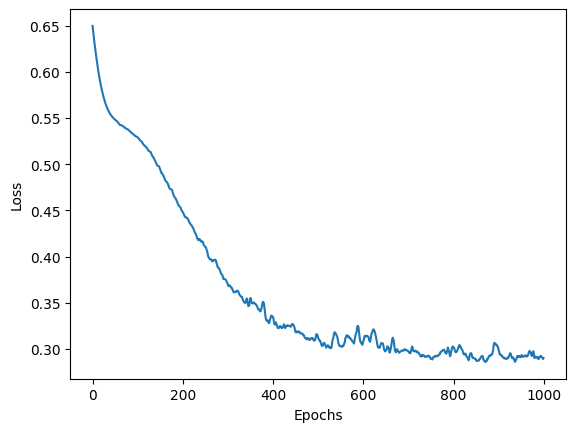

Training Losses are 
          0
0  0.660249
1  0.651426
2  0.642963
3  0.635026
4  0.627439
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2804  240]
 [ 294  662]]
Accuracy: 0.8665, Precision: 0.7339, Recall: 0.6925, F1-score: 0.7126

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2805  239]
 [ 318  638]]
Accuracy: 0.8608, Precision: 0.7275, Recall: 0.6674, F1-score: 0.6961



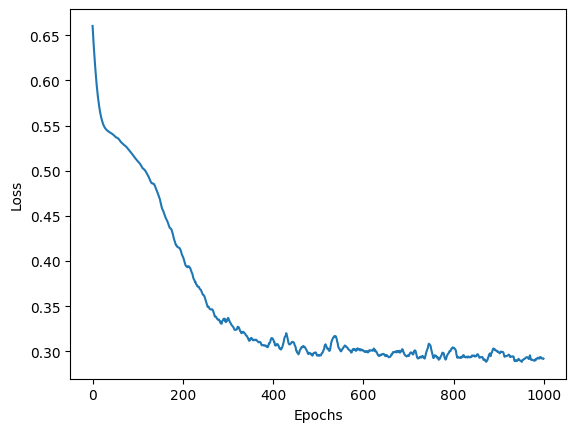

Training Losses are 
          0
0  0.698955
1  0.695953
2  0.692966
3  0.690148
4  0.687296
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[2776  268]
 [ 286  670]]
Accuracy: 0.8615, Precision: 0.7143, Recall: 0.7008, F1-score: 0.7075

Test Data
Confusion Matrix for hiden layer 16 and 8
[[2775  269]
 [ 262  694]]
Accuracy: 0.8672, Precision: 0.7207, Recall: 0.7259, F1-score: 0.7233



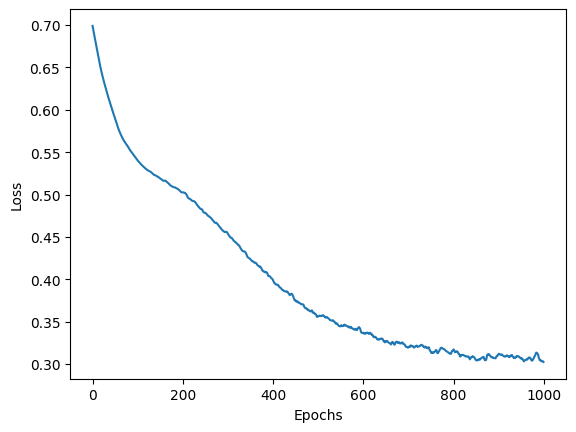

Training Losses are 
          0
0  0.795413
1  0.789038
2  0.782878
3  0.777203
4  0.771696
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2836  208]
 [ 357  599]]
Accuracy: 0.8588, Precision: 0.7423, Recall: 0.6266, F1-score: 0.6795

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2839  205]
 [ 326  630]]
Accuracy: 0.8672, Precision: 0.7545, Recall: 0.6590, F1-score: 0.7035



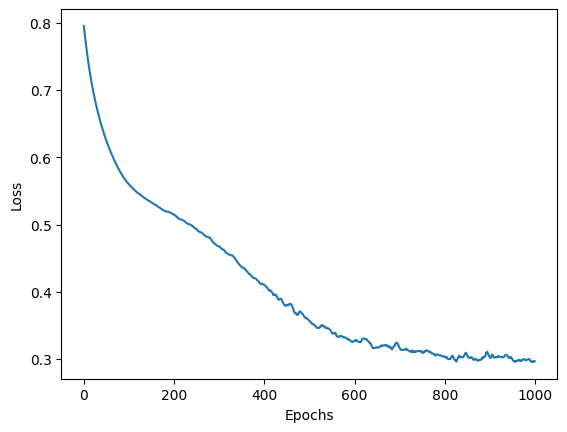

Training Losses are 
          0
0  0.721298
1  0.714427
2  0.707699
3  0.701212
4  0.694829
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2797  247]
 [ 320  636]]
Accuracy: 0.8582, Precision: 0.7203, Recall: 0.6653, F1-score: 0.6917

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2801  243]
 [ 302  654]]
Accuracy: 0.8638, Precision: 0.7291, Recall: 0.6841, F1-score: 0.7059



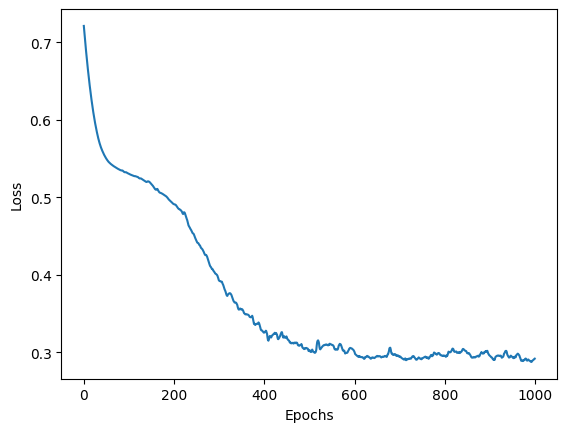

Training Losses are 
          0
0  0.690269
1  0.679020
2  0.668316
3  0.658157
4  0.648484
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2838  206]
 [ 322  634]]
Accuracy: 0.8680, Precision: 0.7548, Recall: 0.6632, F1-score: 0.7060

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2846  198]
 [ 320  636]]
Accuracy: 0.8705, Precision: 0.7626, Recall: 0.6653, F1-score: 0.7106



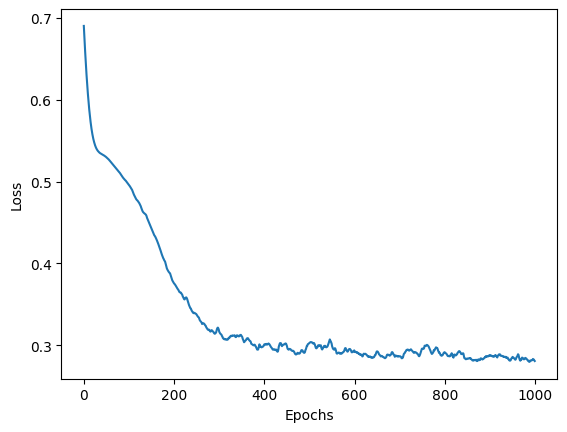

Training Losses are 
          0
0  0.661218
1  0.658314
2  0.655370
3  0.652545
4  0.649761
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2744  300]
 [ 232  724]]
Accuracy: 0.8670, Precision: 0.7070, Recall: 0.7573, F1-score: 0.7313

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2753  291]
 [ 235  721]]
Accuracy: 0.8685, Precision: 0.7125, Recall: 0.7542, F1-score: 0.7327



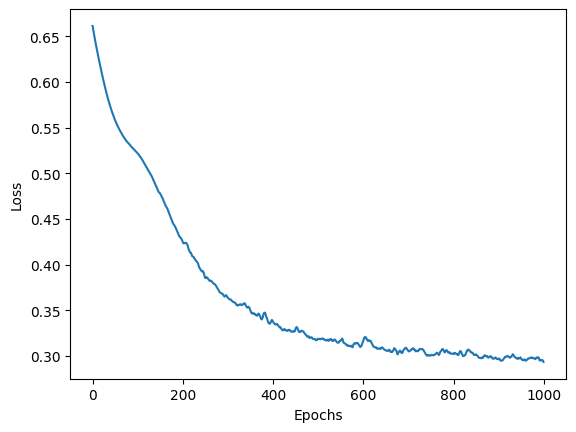

Training Losses are 
          0
0  0.673334
1  0.668398
2  0.663564
3  0.658757
4  0.654033
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2830  214]
 [ 297  659]]
Accuracy: 0.8722, Precision: 0.7549, Recall: 0.6893, F1-score: 0.7206

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2840  204]
 [ 289  667]]
Accuracy: 0.8768, Precision: 0.7658, Recall: 0.6977, F1-score: 0.7302



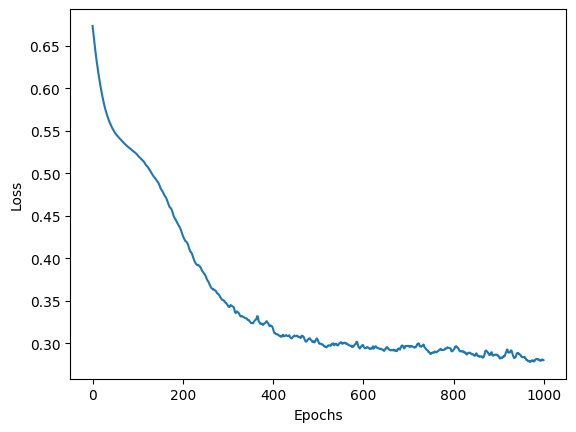

Training Losses are 
          0
0  0.668805
1  0.661848
2  0.655112
3  0.648601
4  0.642275
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2807  237]
 [ 318  638]]
Accuracy: 0.8612, Precision: 0.7291, Recall: 0.6674, F1-score: 0.6969

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2816  228]
 [ 291  665]]
Accuracy: 0.8702, Precision: 0.7447, Recall: 0.6956, F1-score: 0.7193



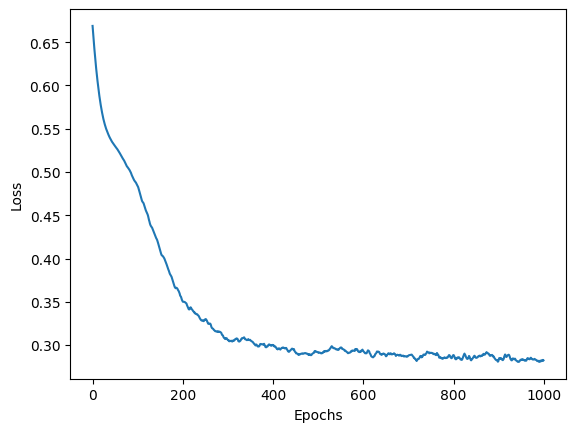

Training Losses are 
          0
0  0.658983
1  0.647669
2  0.637096
3  0.627132
4  0.617857
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2834  210]
 [ 320  636]]
Accuracy: 0.8675, Precision: 0.7518, Recall: 0.6653, F1-score: 0.7059

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2842  202]
 [ 327  629]]
Accuracy: 0.8678, Precision: 0.7569, Recall: 0.6579, F1-score: 0.7040



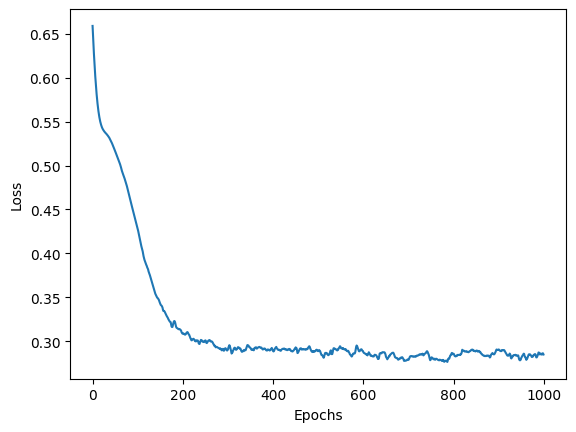

Training Losses are 
          0
0  0.594347
1  0.591593
2  0.588714
3  0.585914
4  0.583133
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2846  198]
 [ 298  658]]
Accuracy: 0.8760, Precision: 0.7687, Recall: 0.6883, F1-score: 0.7263

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2845  199]
 [ 317  639]]
Accuracy: 0.8710, Precision: 0.7625, Recall: 0.6684, F1-score: 0.7124



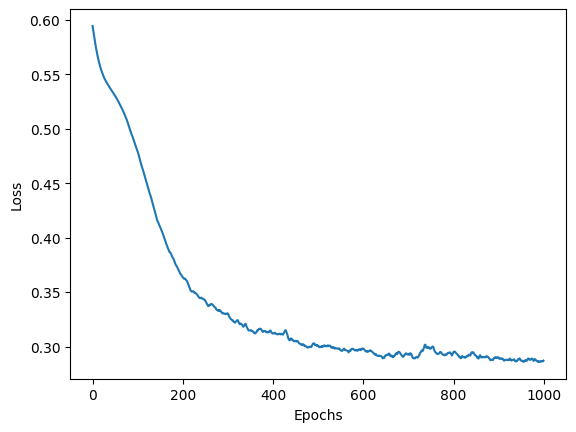

Training Losses are 
          0
0  0.623763
1  0.617665
2  0.611743
3  0.606012
4  0.600541
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2871  173]
 [ 346  610]]
Accuracy: 0.8702, Precision: 0.7791, Recall: 0.6381, F1-score: 0.7016

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2863  181]
 [ 347  609]]
Accuracy: 0.8680, Precision: 0.7709, Recall: 0.6370, F1-score: 0.6976



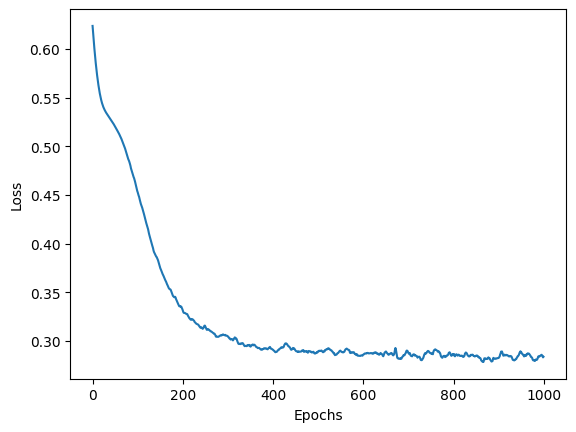

Training Losses are 
          0
0  0.601300
1  0.594333
2  0.587792
3  0.581713
4  0.576010
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2822  222]
 [ 322  634]]
Accuracy: 0.8640, Precision: 0.7407, Recall: 0.6632, F1-score: 0.6998

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2828  216]
 [ 313  643]]
Accuracy: 0.8678, Precision: 0.7485, Recall: 0.6726, F1-score: 0.7085



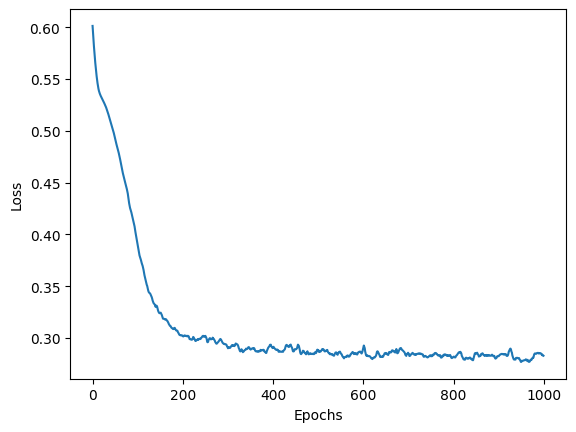

Training Losses are 
          0
0  0.694016
1  0.676045
2  0.659361
3  0.643976
4  0.629778
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2896  148]
 [ 394  562]]
Accuracy: 0.8645, Precision: 0.7915, Recall: 0.5879, F1-score: 0.6747

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2890  154]
 [ 388  568]]
Accuracy: 0.8645, Precision: 0.7867, Recall: 0.5941, F1-score: 0.6770



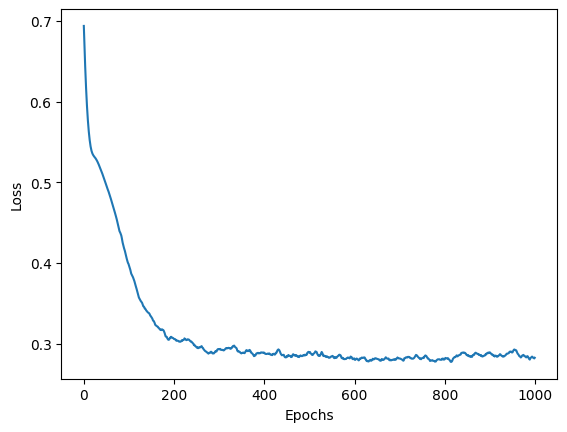

Best accuracy for test data is 0.87675 for degree 8


In [25]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(50,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [26]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.681647
1  0.679800
2  0.677929
3  0.676069
4  0.674298
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[2839  205]
 [ 342  614]]
Accuracy: 0.8632, Precision: 0.7497, Recall: 0.6423, F1-score: 0.6918

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[2831  213]
 [ 348  608]]
Accuracy: 0.8598, Precision: 0.7406, Recall: 0.6360, F1-score: 0.6843



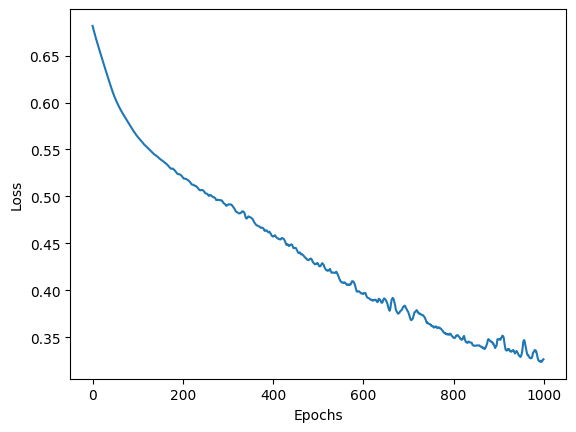

Training Losses are 
          0
0  0.722495
1  0.720676
2  0.718891
3  0.717140
4  0.715358
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2837  207]
 [ 307  649]]
Accuracy: 0.8715, Precision: 0.7582, Recall: 0.6789, F1-score: 0.7163

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2849  195]
 [ 296  660]]
Accuracy: 0.8772, Precision: 0.7719, Recall: 0.6904, F1-score: 0.7289



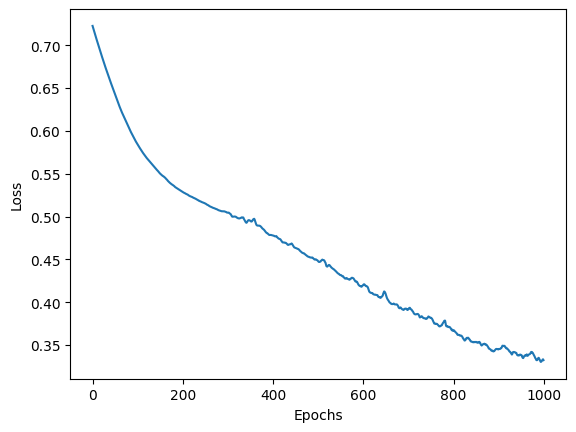

Training Losses are 
          0
0  0.751336
1  0.748301
2  0.745282
3  0.742292
4  0.739316
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2704  340]
 [ 232  724]]
Accuracy: 0.8570, Precision: 0.6805, Recall: 0.7573, F1-score: 0.7168

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2704  340]
 [ 230  726]]
Accuracy: 0.8575, Precision: 0.6811, Recall: 0.7594, F1-score: 0.7181



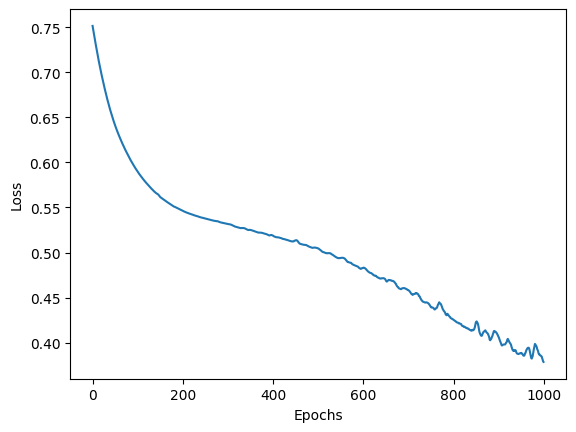

Training Losses are 
          0
0  0.689136
1  0.686937
2  0.684699
3  0.682580
4  0.680420
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2795  249]
 [ 290  666]]
Accuracy: 0.8652, Precision: 0.7279, Recall: 0.6967, F1-score: 0.7119

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2811  233]
 [ 276  680]]
Accuracy: 0.8728, Precision: 0.7448, Recall: 0.7113, F1-score: 0.7277



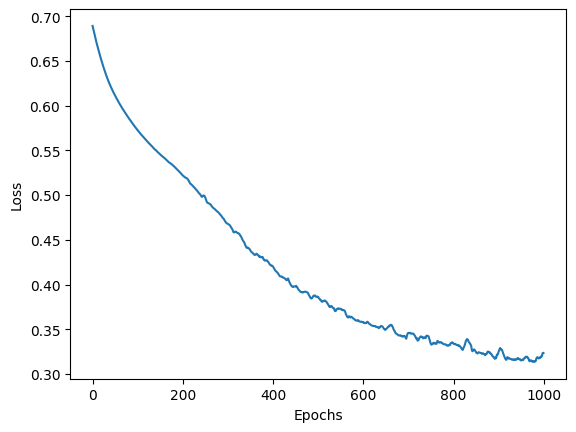

Training Losses are 
          0
0  0.617726
1  0.615897
2  0.614080
3  0.612287
4  0.610485
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2837  207]
 [ 375  581]]
Accuracy: 0.8545, Precision: 0.7373, Recall: 0.6077, F1-score: 0.6663

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2842  202]
 [ 350  606]]
Accuracy: 0.8620, Precision: 0.7500, Recall: 0.6339, F1-score: 0.6871



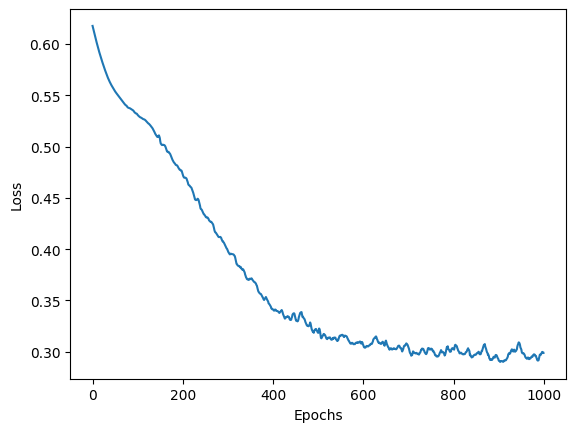

Training Losses are 
          0
0  0.750751
1  0.746751
2  0.742757
3  0.738655
4  0.734594
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2903  141]
 [ 401  555]]
Accuracy: 0.8645, Precision: 0.7974, Recall: 0.5805, F1-score: 0.6719

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2907  137]
 [ 403  553]]
Accuracy: 0.8650, Precision: 0.8014, Recall: 0.5785, F1-score: 0.6719



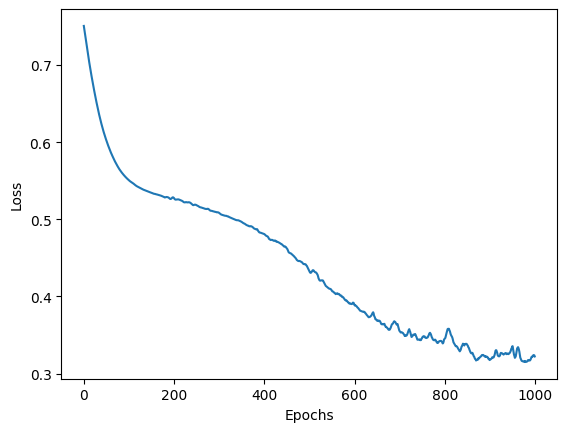

Training Losses are 
          0
0  0.738882
1  0.734552
2  0.730357
3  0.726350
4  0.722337
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2918  126]
 [ 411  545]]
Accuracy: 0.8658, Precision: 0.8122, Recall: 0.5701, F1-score: 0.6699

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2918  126]
 [ 425  531]]
Accuracy: 0.8622, Precision: 0.8082, Recall: 0.5554, F1-score: 0.6584



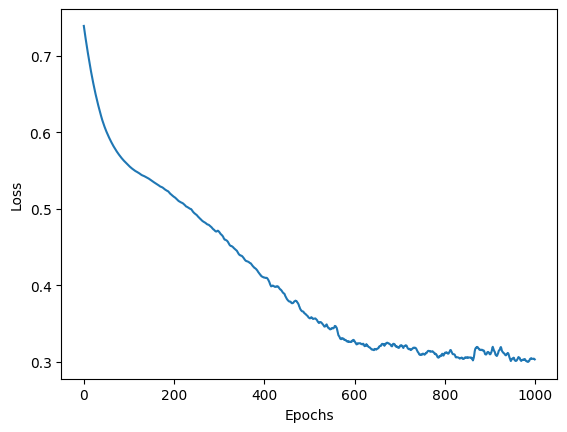

Training Losses are 
          0
0  0.965920
1  0.959937
2  0.954085
3  0.948218
4  0.942380
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2722  322]
 [ 215  741]]
Accuracy: 0.8658, Precision: 0.6971, Recall: 0.7751, F1-score: 0.7340

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2716  328]
 [ 198  758]]
Accuracy: 0.8685, Precision: 0.6980, Recall: 0.7929, F1-score: 0.7424



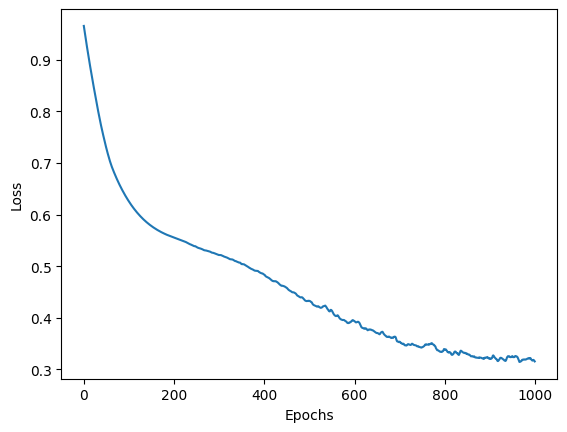

Training Losses are 
          0
0  0.907909
1  0.898401
2  0.889025
3  0.879835
4  0.870885
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2704  340]
 [ 199  757]]
Accuracy: 0.8652, Precision: 0.6901, Recall: 0.7918, F1-score: 0.7375

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2691  353]
 [ 194  762]]
Accuracy: 0.8632, Precision: 0.6834, Recall: 0.7971, F1-score: 0.7359



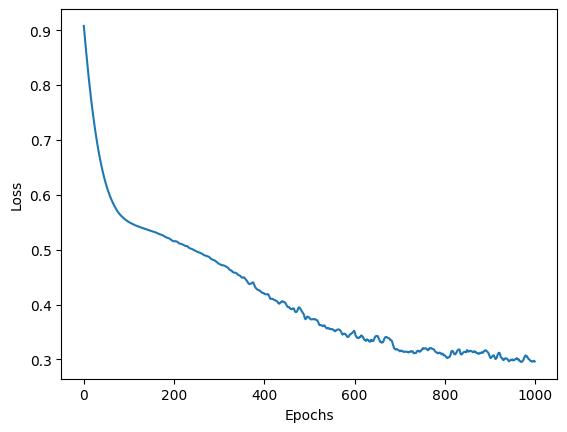

Training Losses are 
          0
0  0.761537
1  0.754117
2  0.746815
3  0.739723
4  0.732785
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2891  153]
 [ 362  594]]
Accuracy: 0.8712, Precision: 0.7952, Recall: 0.6213, F1-score: 0.6976

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2878  166]
 [ 370  586]]
Accuracy: 0.8660, Precision: 0.7793, Recall: 0.6130, F1-score: 0.6862



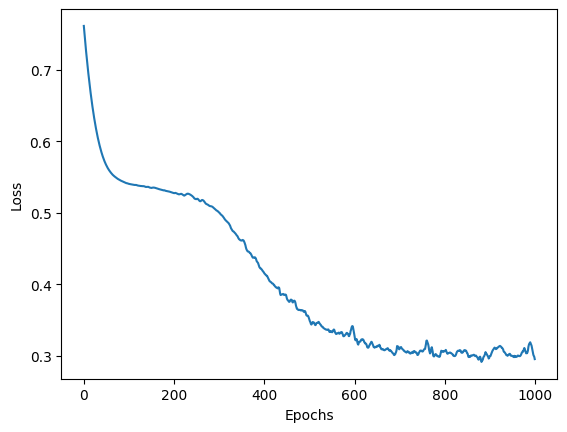

Training Losses are 
          0
0  0.752407
1  0.745807
2  0.739137
3  0.732590
4  0.726112
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2762  282]
 [ 250  706]]
Accuracy: 0.8670, Precision: 0.7146, Recall: 0.7385, F1-score: 0.7263

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2756  288]
 [ 237  719]]
Accuracy: 0.8688, Precision: 0.7140, Recall: 0.7521, F1-score: 0.7326



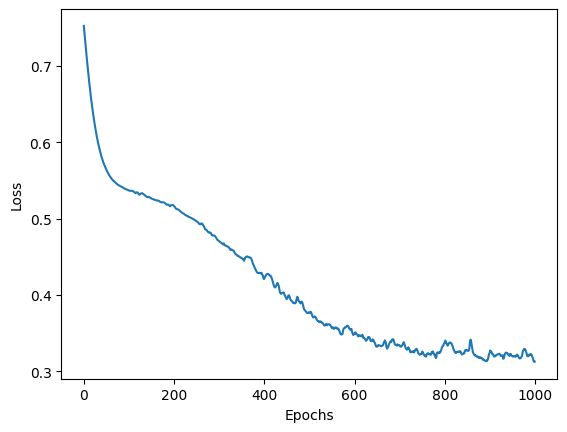

Training Losses are 
          0
0  0.618357
1  0.614661
2  0.611073
3  0.607676
4  0.604381
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2750  294]
 [ 235  721]]
Accuracy: 0.8678, Precision: 0.7103, Recall: 0.7542, F1-score: 0.7316

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2738  306]
 [ 229  727]]
Accuracy: 0.8662, Precision: 0.7038, Recall: 0.7605, F1-score: 0.7310



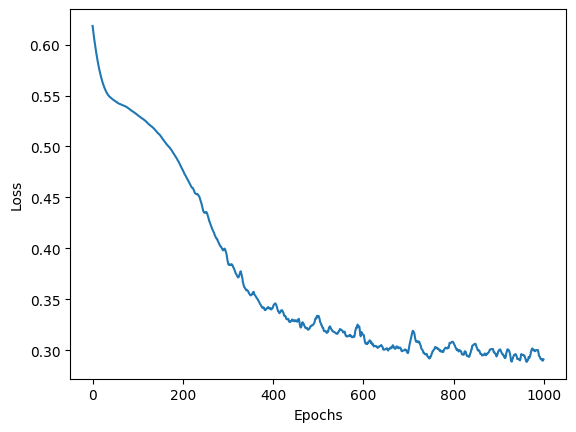

Training Losses are 
          0
0  0.908380
1  0.891792
2  0.875647
3  0.859942
4  0.844670
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2871  173]
 [ 369  587]]
Accuracy: 0.8645, Precision: 0.7724, Recall: 0.6140, F1-score: 0.6841

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2858  186]
 [ 378  578]]
Accuracy: 0.8590, Precision: 0.7565, Recall: 0.6046, F1-score: 0.6721



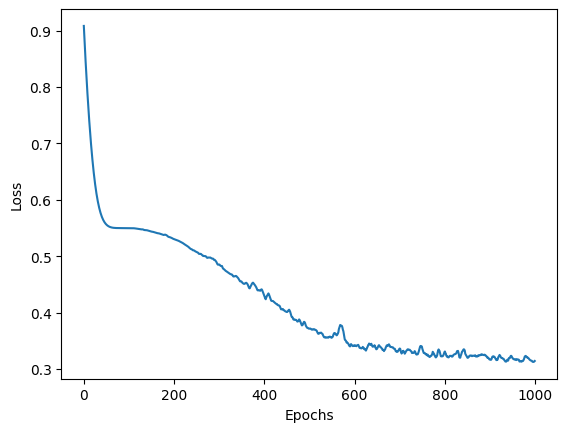

Training Losses are 
          0
0  0.785133
1  0.771571
2  0.758489
3  0.745879
4  0.733769
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2743  301]
 [ 242  714]]
Accuracy: 0.8642, Precision: 0.7034, Recall: 0.7469, F1-score: 0.7245

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2755  289]
 [ 224  732]]
Accuracy: 0.8718, Precision: 0.7169, Recall: 0.7657, F1-score: 0.7405



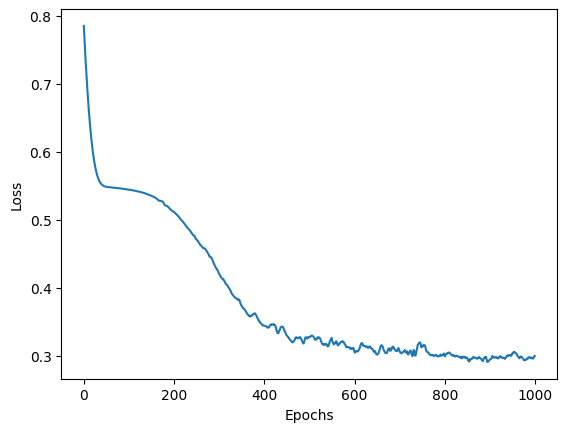

Training Losses are 
          0
0  0.686851
1  0.676722
2  0.667075
3  0.657842
4  0.649024
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2853  191]
 [ 328  628]]
Accuracy: 0.8702, Precision: 0.7668, Recall: 0.6569, F1-score: 0.7076

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2846  198]
 [ 326  630]]
Accuracy: 0.8690, Precision: 0.7609, Recall: 0.6590, F1-score: 0.7063



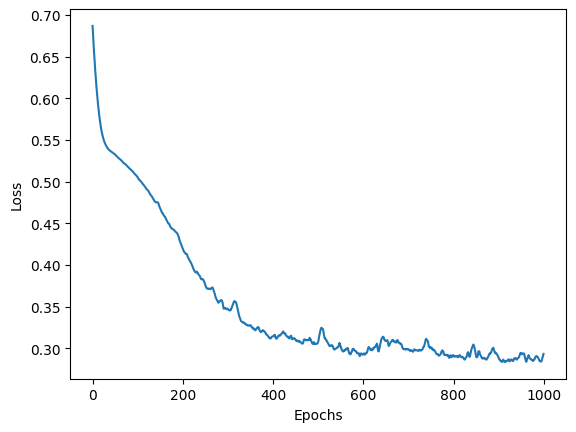

Training Losses are 
          0
0  0.670637
1  0.661615
2  0.653065
3  0.644854
4  0.636947
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2838  206]
 [ 323  633]]
Accuracy: 0.8678, Precision: 0.7545, Recall: 0.6621, F1-score: 0.7053

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2832  212]
 [ 338  618]]
Accuracy: 0.8625, Precision: 0.7446, Recall: 0.6464, F1-score: 0.6920



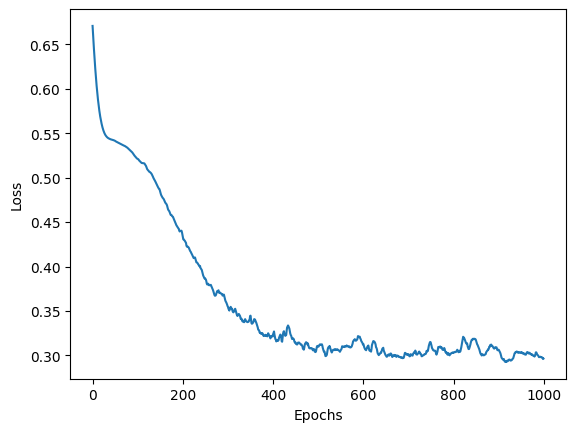

Training Losses are 
          0
0  0.693133
1  0.690790
2  0.688577
3  0.686299
4  0.684093
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2811  233]
 [ 290  666]]
Accuracy: 0.8692, Precision: 0.7408, Recall: 0.6967, F1-score: 0.7181

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2821  223]
 [ 303  653]]
Accuracy: 0.8685, Precision: 0.7454, Recall: 0.6831, F1-score: 0.7129



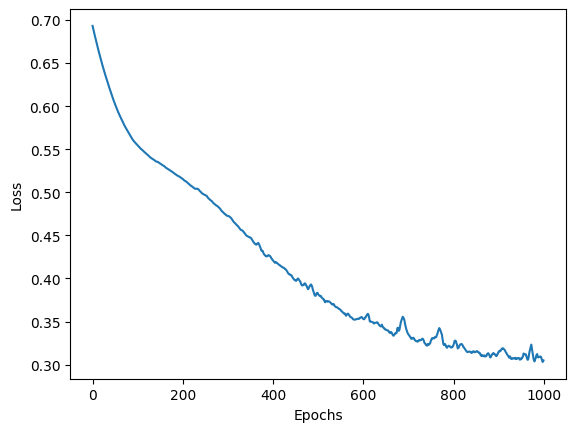

Training Losses are 
          0
0  0.664316
1  0.661966
2  0.659793
3  0.657554
4  0.655529
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2756  288]
 [ 231  725]]
Accuracy: 0.8702, Precision: 0.7157, Recall: 0.7584, F1-score: 0.7364

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2728  316]
 [ 217  739]]
Accuracy: 0.8668, Precision: 0.7005, Recall: 0.7730, F1-score: 0.7350



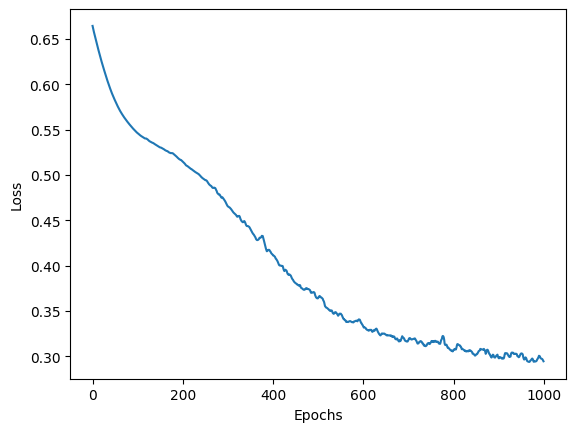

Training Losses are 
          0
0  0.665799
1  0.663403
2  0.660993
3  0.658619
4  0.656347
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2850  194]
 [ 367  589]]
Accuracy: 0.8598, Precision: 0.7522, Recall: 0.6161, F1-score: 0.6774

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2847  197]
 [ 373  583]]
Accuracy: 0.8575, Precision: 0.7474, Recall: 0.6098, F1-score: 0.6717



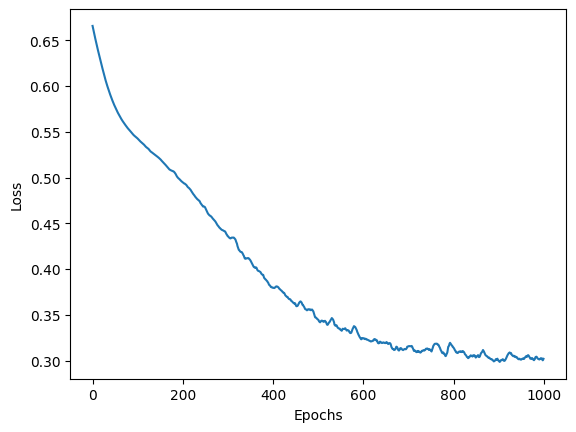

Training Losses are 
          0
0  0.596631
1  0.595177
2  0.593637
3  0.592106
4  0.590628
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2927  117]
 [ 409  547]]
Accuracy: 0.8685, Precision: 0.8238, Recall: 0.5722, F1-score: 0.6753

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2920  124]
 [ 425  531]]
Accuracy: 0.8628, Precision: 0.8107, Recall: 0.5554, F1-score: 0.6592



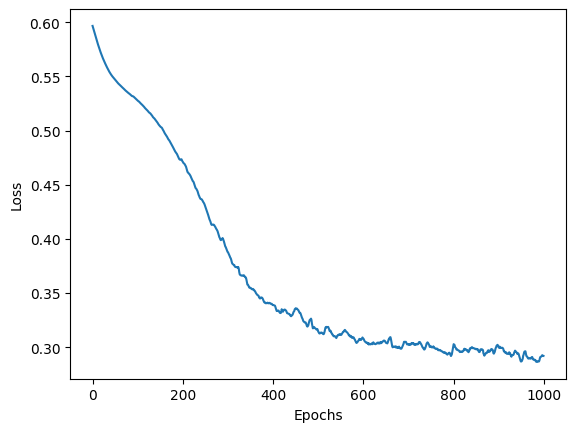

Training Losses are 
          0
0  0.678936
1  0.675299
2  0.671779
3  0.668323
4  0.664935
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2799  245]
 [ 280  676]]
Accuracy: 0.8688, Precision: 0.7340, Recall: 0.7071, F1-score: 0.7203

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2810  234]
 [ 299  657]]
Accuracy: 0.8668, Precision: 0.7374, Recall: 0.6872, F1-score: 0.7114



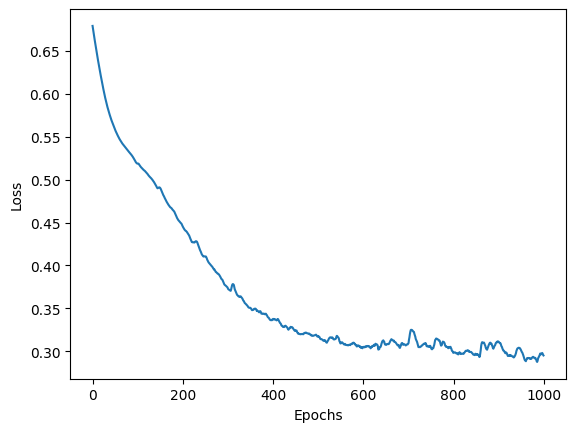

Training Losses are 
          0
0  0.763431
1  0.758759
2  0.754007
3  0.749282
4  0.744644
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2728  316]
 [ 227  729]]
Accuracy: 0.8642, Precision: 0.6976, Recall: 0.7626, F1-score: 0.7286

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2755  289]
 [ 231  725]]
Accuracy: 0.8700, Precision: 0.7150, Recall: 0.7584, F1-score: 0.7360



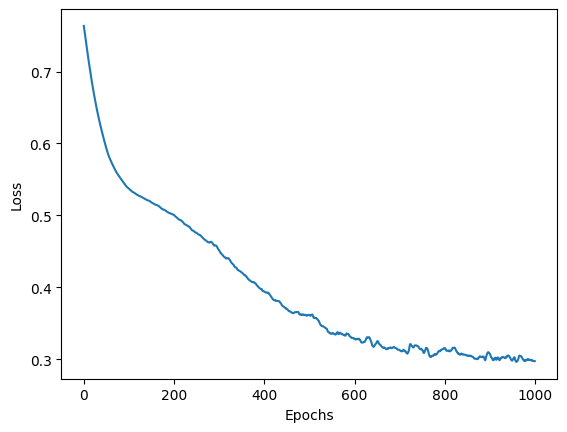

Training Losses are 
          0
0  0.608122
1  0.605140
2  0.602284
3  0.599568
4  0.596947
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2781  263]
 [ 257  699]]
Accuracy: 0.8700, Precision: 0.7266, Recall: 0.7312, F1-score: 0.7289

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2778  266]
 [ 271  685]]
Accuracy: 0.8658, Precision: 0.7203, Recall: 0.7165, F1-score: 0.7184



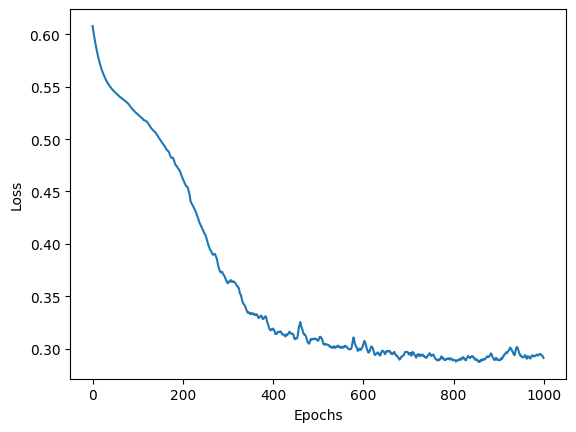

Training Losses are 
          0
0  0.746222
1  0.742033
2  0.737856
3  0.733709
4  0.729727
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2889  155]
 [ 369  587]]
Accuracy: 0.8690, Precision: 0.7911, Recall: 0.6140, F1-score: 0.6914

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2882  162]
 [ 372  584]]
Accuracy: 0.8665, Precision: 0.7828, Recall: 0.6109, F1-score: 0.6863



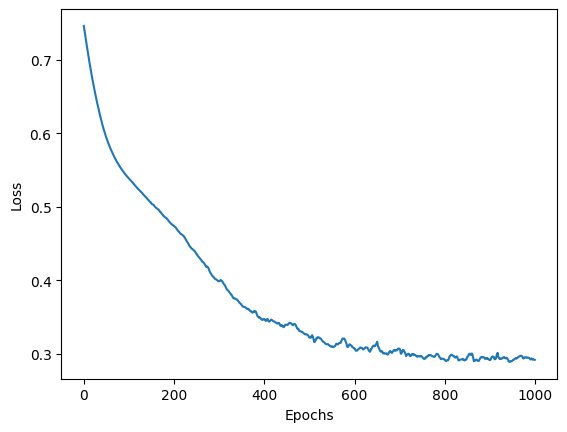

Training Losses are 
          0
0  0.749223
1  0.741885
2  0.734729
3  0.727741
4  0.720901
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2798  246]
 [ 317  639]]
Accuracy: 0.8592, Precision: 0.7220, Recall: 0.6684, F1-score: 0.6942

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2791  253]
 [ 302  654]]
Accuracy: 0.8612, Precision: 0.7211, Recall: 0.6841, F1-score: 0.7021



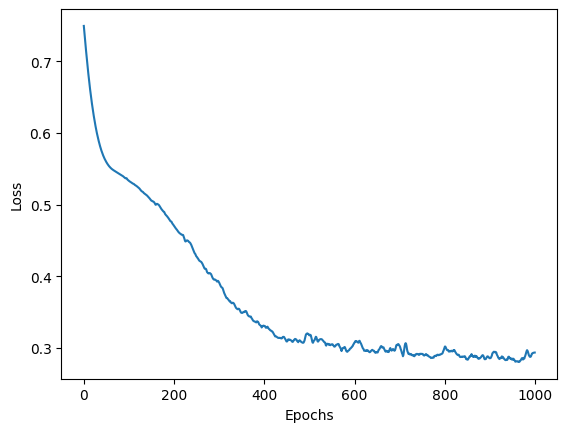

Training Losses are 
          0
0  0.680835
1  0.674476
2  0.668298
3  0.662282
4  0.656417
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2770  274]
 [ 251  705]]
Accuracy: 0.8688, Precision: 0.7201, Recall: 0.7374, F1-score: 0.7287

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2775  269]
 [ 242  714]]
Accuracy: 0.8722, Precision: 0.7263, Recall: 0.7469, F1-score: 0.7365



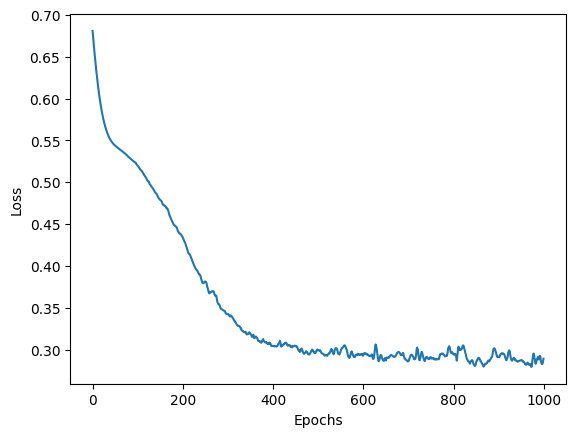

Training Losses are 
          0
0  0.738633
1  0.731551
2  0.724302
3  0.717237
4  0.710376
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2882  162]
 [ 406  550]]
Accuracy: 0.8580, Precision: 0.7725, Recall: 0.5753, F1-score: 0.6595

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2886  158]
 [ 398  558]]
Accuracy: 0.8610, Precision: 0.7793, Recall: 0.5837, F1-score: 0.6675



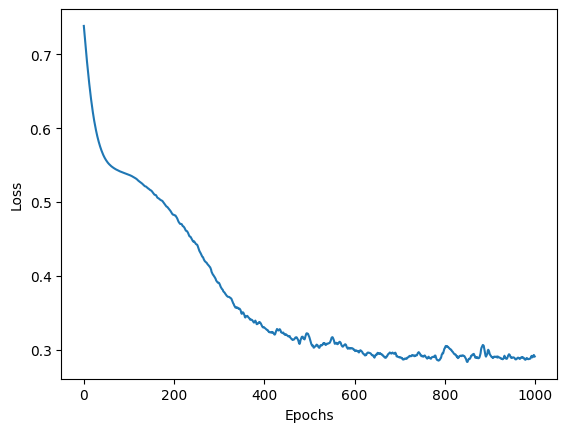

Training Losses are 
          0
0  0.624092
1  0.619756
2  0.615472
3  0.611298
4  0.607238
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2866  178]
 [ 366  590]]
Accuracy: 0.8640, Precision: 0.7682, Recall: 0.6172, F1-score: 0.6845

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2874  170]
 [ 367  589]]
Accuracy: 0.8658, Precision: 0.7760, Recall: 0.6161, F1-score: 0.6869



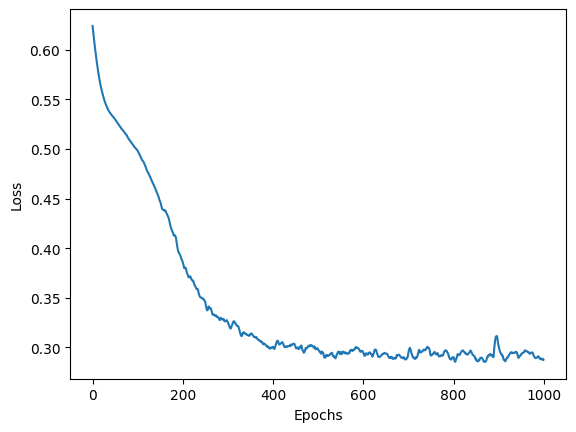

Training Losses are 
          0
0  0.682643
1  0.672174
2  0.662198
3  0.652650
4  0.643549
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2781  263]
 [ 301  655]]
Accuracy: 0.8590, Precision: 0.7135, Recall: 0.6851, F1-score: 0.6990

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2803  241]
 [ 297  659]]
Accuracy: 0.8655, Precision: 0.7322, Recall: 0.6893, F1-score: 0.7101



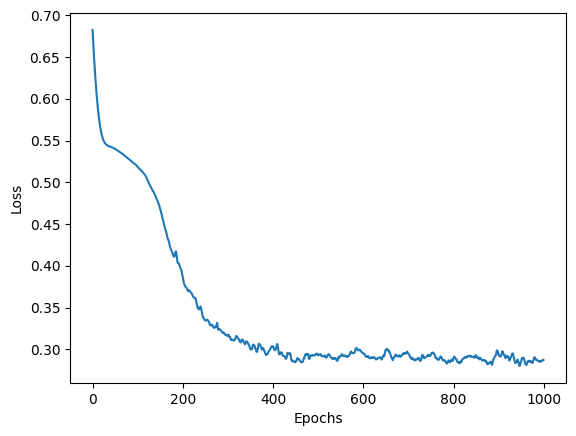

Training Losses are 
          0
0  0.699965
1  0.687448
2  0.675468
3  0.664149
4  0.653482
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2765  279]
 [ 281  675]]
Accuracy: 0.8600, Precision: 0.7075, Recall: 0.7061, F1-score: 0.7068

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2762  282]
 [ 292  664]]
Accuracy: 0.8565, Precision: 0.7019, Recall: 0.6946, F1-score: 0.6982



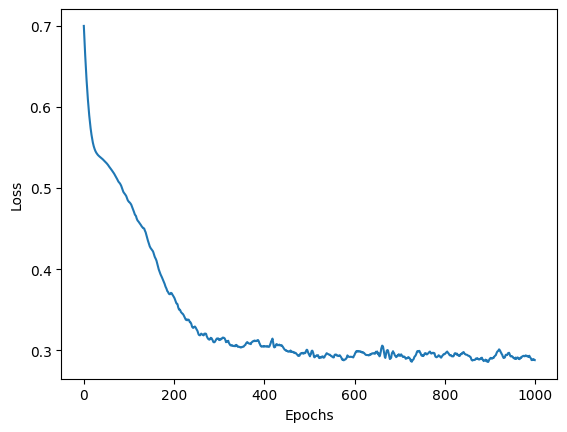

Training Losses are 
          0
0  0.705855
1  0.695121
2  0.684804
3  0.674919
4  0.665414
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2767  277]
 [ 238  718]]
Accuracy: 0.8712, Precision: 0.7216, Recall: 0.7510, F1-score: 0.7360

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2785  259]
 [ 261  695]]
Accuracy: 0.8700, Precision: 0.7285, Recall: 0.7270, F1-score: 0.7277



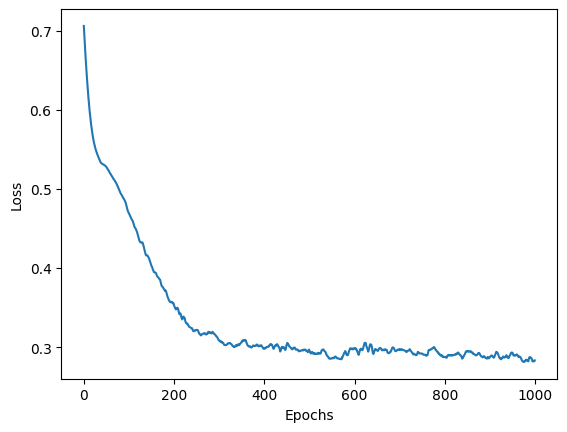

Training Losses are 
          0
0  0.703116
1  0.691623
2  0.680595
3  0.670090
4  0.660009
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2785  259]
 [ 274  682]]
Accuracy: 0.8668, Precision: 0.7248, Recall: 0.7134, F1-score: 0.7190

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2763  281]
 [ 269  687]]
Accuracy: 0.8625, Precision: 0.7097, Recall: 0.7186, F1-score: 0.7141



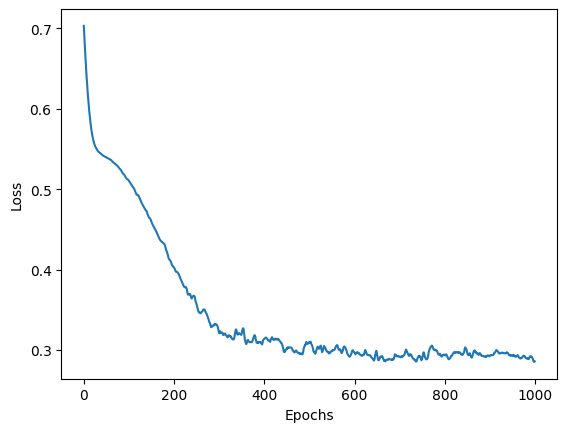

Training Losses are 
          0
0  0.741994
1  0.738507
2  0.735013
3  0.731568
4  0.728203
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2809  235]
 [ 290  666]]
Accuracy: 0.8688, Precision: 0.7392, Recall: 0.6967, F1-score: 0.7173

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2803  241]
 [ 284  672]]
Accuracy: 0.8688, Precision: 0.7360, Recall: 0.7029, F1-score: 0.7191



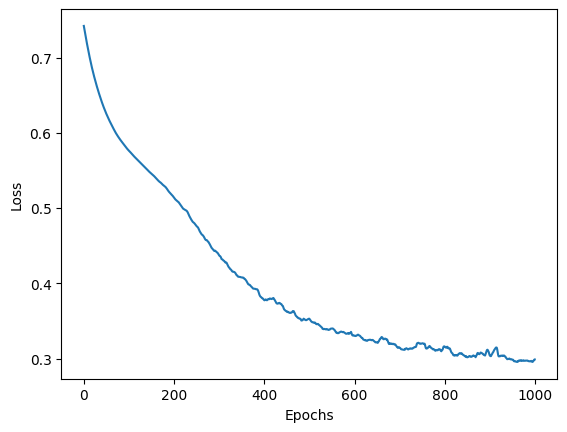

Training Losses are 
          0
0  0.716301
1  0.712816
2  0.709399
3  0.706058
4  0.702728
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2774  270]
 [ 261  695]]
Accuracy: 0.8672, Precision: 0.7202, Recall: 0.7270, F1-score: 0.7236

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2776  268]
 [ 248  708]]
Accuracy: 0.8710, Precision: 0.7254, Recall: 0.7406, F1-score: 0.7329



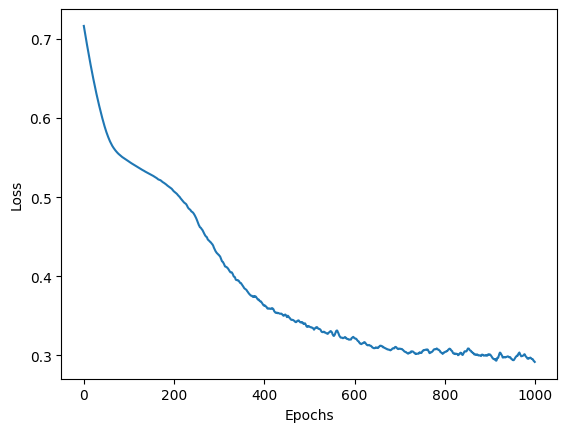

Training Losses are 
          0
0  0.660292
1  0.657973
2  0.655732
3  0.653572
4  0.651452
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2826  218]
 [ 312  644]]
Accuracy: 0.8675, Precision: 0.7471, Recall: 0.6736, F1-score: 0.7085

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2833  211]
 [ 289  667]]
Accuracy: 0.8750, Precision: 0.7597, Recall: 0.6977, F1-score: 0.7274



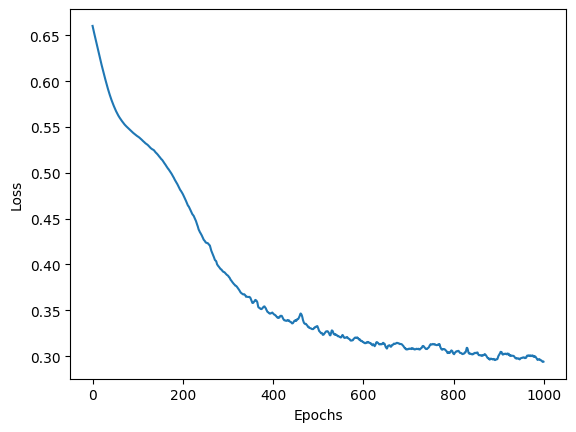

Training Losses are 
          0
0  0.890164
1  0.884234
2  0.878261
3  0.872198
4  0.866158
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2866  178]
 [ 340  616]]
Accuracy: 0.8705, Precision: 0.7758, Recall: 0.6444, F1-score: 0.7040

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2860  184]
 [ 362  594]]
Accuracy: 0.8635, Precision: 0.7635, Recall: 0.6213, F1-score: 0.6851



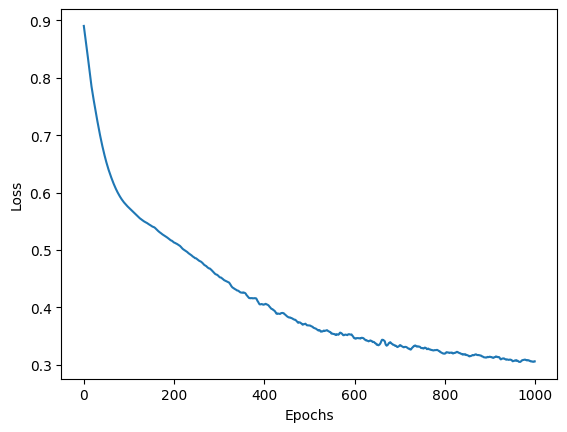

Training Losses are 
          0
0  0.695088
1  0.690462
2  0.685851
3  0.681208
4  0.676524
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2808  236]
 [ 285  671]]
Accuracy: 0.8698, Precision: 0.7398, Recall: 0.7019, F1-score: 0.7203

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2817  227]
 [ 297  659]]
Accuracy: 0.8690, Precision: 0.7438, Recall: 0.6893, F1-score: 0.7155



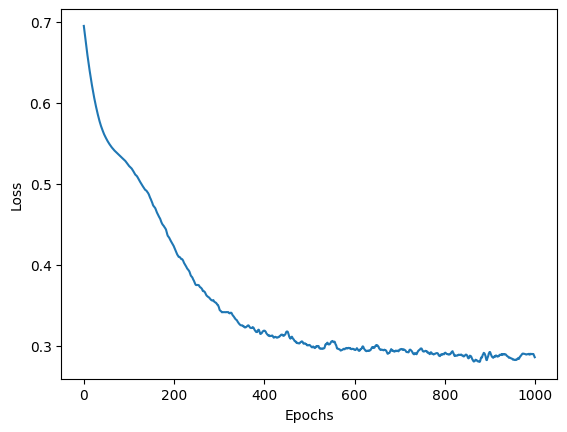

Training Losses are 
          0
0  0.750952
1  0.744629
2  0.738435
3  0.732408
4  0.726463
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2897  147]
 [ 371  585]]
Accuracy: 0.8705, Precision: 0.7992, Recall: 0.6119, F1-score: 0.6931

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2900  144]
 [ 391  565]]
Accuracy: 0.8662, Precision: 0.7969, Recall: 0.5910, F1-score: 0.6787



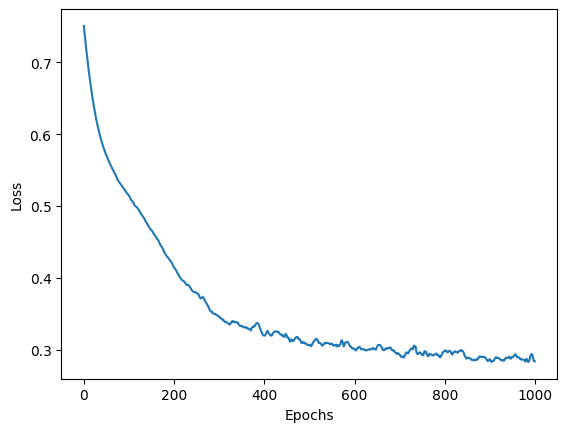

Training Losses are 
          0
0  0.666241
1  0.661852
2  0.657455
3  0.653128
4  0.648897
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2837  207]
 [ 323  633]]
Accuracy: 0.8675, Precision: 0.7536, Recall: 0.6621, F1-score: 0.7049

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2837  207]
 [ 333  623]]
Accuracy: 0.8650, Precision: 0.7506, Recall: 0.6517, F1-score: 0.6976



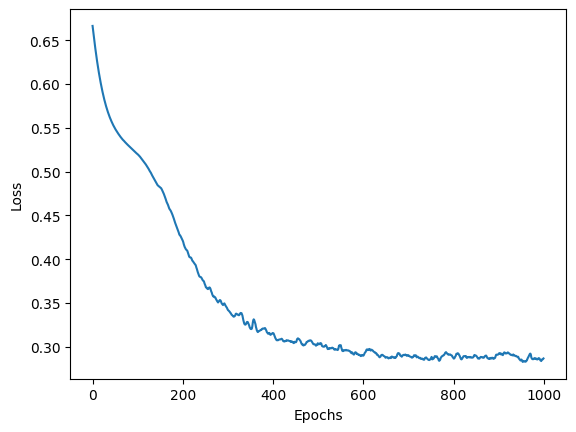

Training Losses are 
          0
0  0.635782
1  0.631462
2  0.627357
3  0.623353
4  0.619417
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2839  205]
 [ 343  613]]
Accuracy: 0.8630, Precision: 0.7494, Recall: 0.6412, F1-score: 0.6911

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2828  216]
 [ 322  634]]
Accuracy: 0.8655, Precision: 0.7459, Recall: 0.6632, F1-score: 0.7021



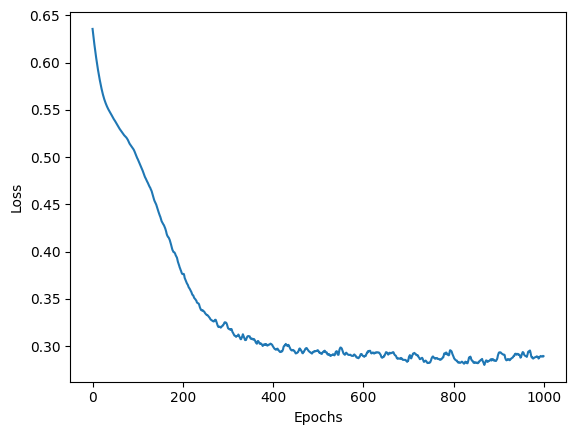

Training Losses are 
          0
0  0.870847
1  0.858616
2  0.846554
3  0.834708
4  0.822950
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2779  265]
 [ 258  698]]
Accuracy: 0.8692, Precision: 0.7248, Recall: 0.7301, F1-score: 0.7275

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2767  277]
 [ 254  702]]
Accuracy: 0.8672, Precision: 0.7171, Recall: 0.7343, F1-score: 0.7256



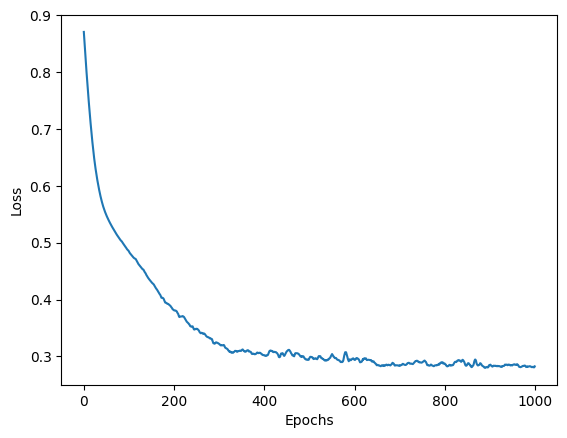

Training Losses are 
          0
0  0.808663
1  0.796229
2  0.784240
3  0.772603
4  0.761292
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2808  236]
 [ 279  677]]
Accuracy: 0.8712, Precision: 0.7415, Recall: 0.7082, F1-score: 0.7245

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2789  255]
 [ 269  687]]
Accuracy: 0.8690, Precision: 0.7293, Recall: 0.7186, F1-score: 0.7239



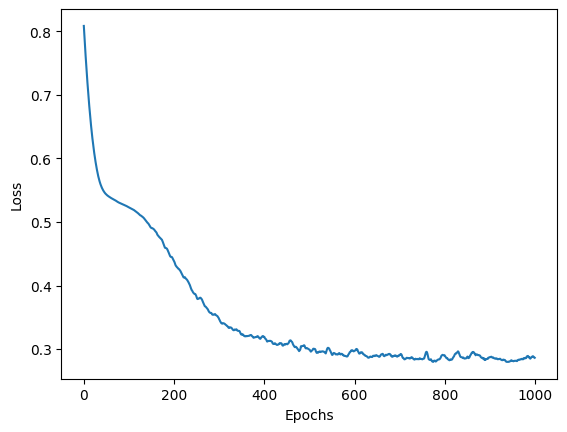

Training Losses are 
          0
0  0.691843
1  0.684084
2  0.676625
3  0.669362
4  0.662351
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2831  213]
 [ 305  651]]
Accuracy: 0.8705, Precision: 0.7535, Recall: 0.6810, F1-score: 0.7154

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2831  213]
 [ 296  660]]
Accuracy: 0.8728, Precision: 0.7560, Recall: 0.6904, F1-score: 0.7217



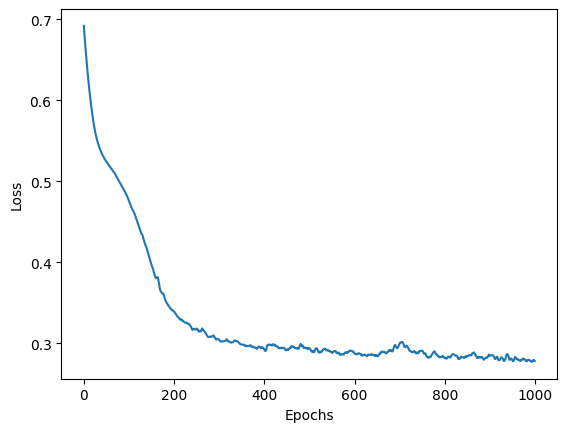

Training Losses are 
          0
0  0.620790
1  0.615621
2  0.610694
3  0.606046
4  0.601584
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2826  218]
 [ 300  656]]
Accuracy: 0.8705, Precision: 0.7506, Recall: 0.6862, F1-score: 0.7169

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2826  218]
 [ 301  655]]
Accuracy: 0.8702, Precision: 0.7503, Recall: 0.6851, F1-score: 0.7162



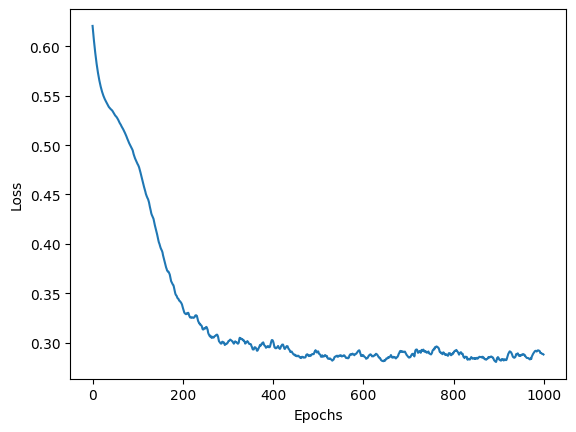

Training Losses are 
          0
0  0.630933
1  0.621180
2  0.612125
3  0.603729
4  0.595989
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2850  194]
 [ 323  633]]
Accuracy: 0.8708, Precision: 0.7654, Recall: 0.6621, F1-score: 0.7100

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2858  186]
 [ 316  640]]
Accuracy: 0.8745, Precision: 0.7748, Recall: 0.6695, F1-score: 0.7183



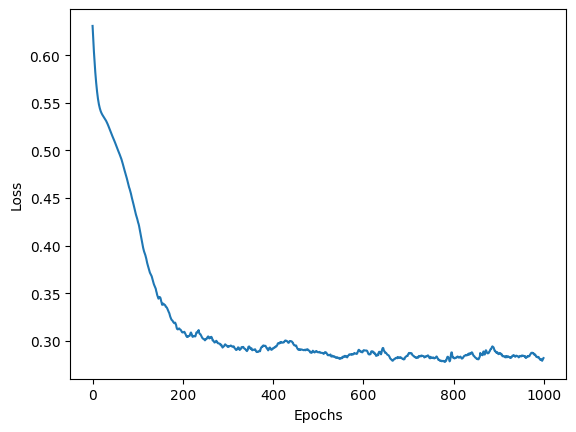

Training Losses are 
          0
0  0.760535
1  0.744615
2  0.729217
3  0.714486
4  0.700426
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2811  233]
 [ 304  652]]
Accuracy: 0.8658, Precision: 0.7367, Recall: 0.6820, F1-score: 0.7083

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2801  243]
 [ 292  664]]
Accuracy: 0.8662, Precision: 0.7321, Recall: 0.6946, F1-score: 0.7128



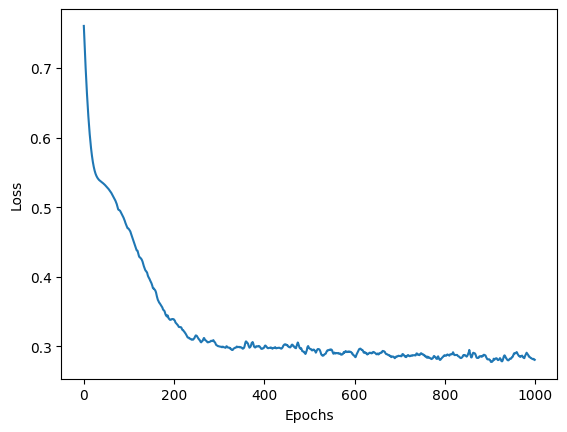

Training Losses are 
          0
0  0.625624
1  0.616279
2  0.607506
3  0.599245
4  0.591615
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2842  202]
 [ 304  652]]
Accuracy: 0.8735, Precision: 0.7635, Recall: 0.6820, F1-score: 0.7204

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2835  209]
 [ 313  643]]
Accuracy: 0.8695, Precision: 0.7547, Recall: 0.6726, F1-score: 0.7113



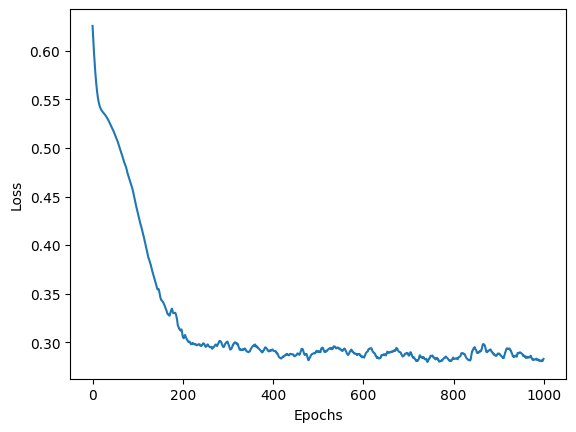

Training Losses are 
          0
0  0.784774
1  0.769129
2  0.753997
3  0.739541
4  0.725700
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2808  236]
 [ 308  648]]
Accuracy: 0.8640, Precision: 0.7330, Recall: 0.6778, F1-score: 0.7043

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2814  230]
 [ 313  643]]
Accuracy: 0.8642, Precision: 0.7365, Recall: 0.6726, F1-score: 0.7031



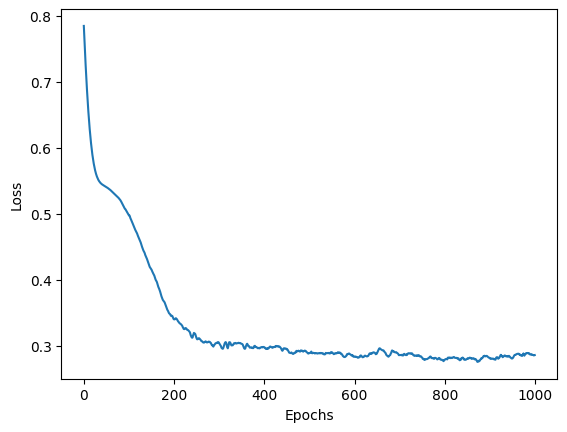

Training Losses are 
          0
0  0.599952
1  0.596775
2  0.593824
3  0.590952
4  0.588145
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2822  222]
 [ 294  662]]
Accuracy: 0.8710, Precision: 0.7489, Recall: 0.6925, F1-score: 0.7196

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2826  218]
 [ 305  651]]
Accuracy: 0.8692, Precision: 0.7491, Recall: 0.6810, F1-score: 0.7134



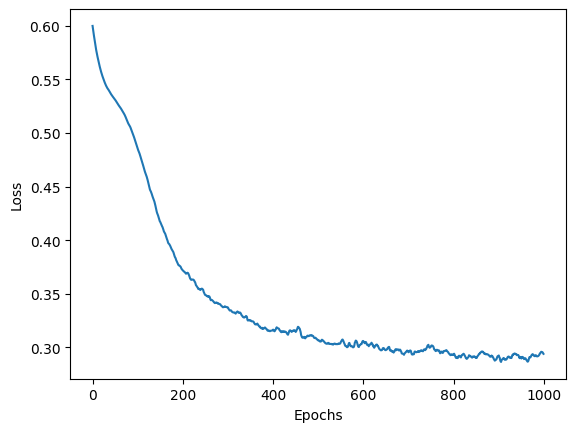

Training Losses are 
          0
0  0.878486
1  0.870749
2  0.863272
3  0.855998
4  0.848934
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2783  261]
 [ 261  695]]
Accuracy: 0.8695, Precision: 0.7270, Recall: 0.7270, F1-score: 0.7270

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2802  242]
 [ 250  706]]
Accuracy: 0.8770, Precision: 0.7447, Recall: 0.7385, F1-score: 0.7416



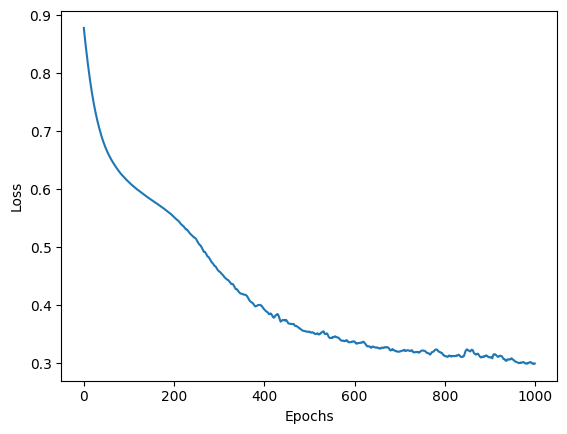

Training Losses are 
          0
0  0.683861
1  0.678894
2  0.673923
3  0.669098
4  0.664374
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2783  261]
 [ 288  668]]
Accuracy: 0.8628, Precision: 0.7191, Recall: 0.6987, F1-score: 0.7088

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2767  277]
 [ 290  666]]
Accuracy: 0.8582, Precision: 0.7063, Recall: 0.6967, F1-score: 0.7014



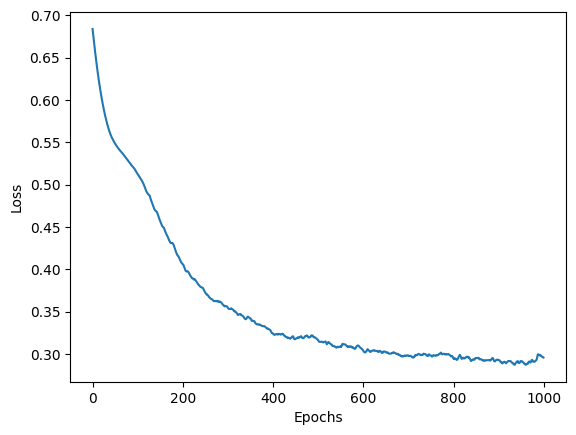

Training Losses are 
          0
0  0.700733
1  0.694659
2  0.688774
3  0.683119
4  0.677571
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2810  234]
 [ 268  688]]
Accuracy: 0.8745, Precision: 0.7462, Recall: 0.7197, F1-score: 0.7327

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2812  232]
 [ 271  685]]
Accuracy: 0.8742, Precision: 0.7470, Recall: 0.7165, F1-score: 0.7314



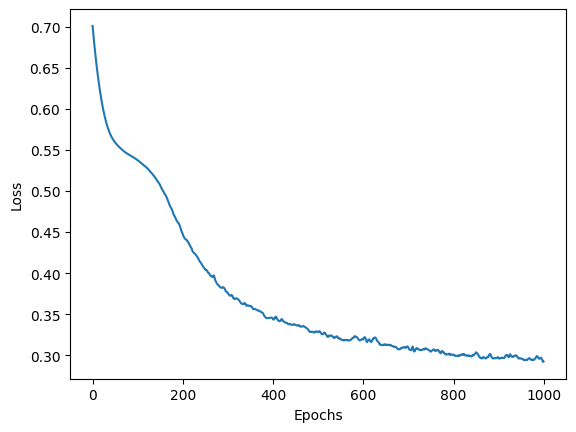

Training Losses are 
          0
0  0.739228
1  0.730695
2  0.722429
3  0.714410
4  0.706663
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2813  231]
 [ 284  672]]
Accuracy: 0.8712, Precision: 0.7442, Recall: 0.7029, F1-score: 0.7230

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2817  227]
 [ 292  664]]
Accuracy: 0.8702, Precision: 0.7452, Recall: 0.6946, F1-score: 0.7190



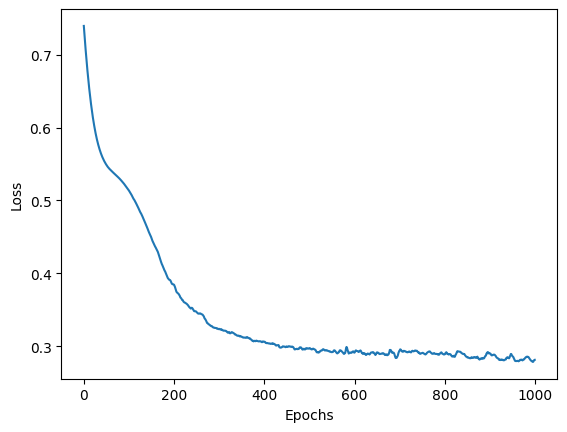

Training Losses are 
          0
0  0.710769
1  0.702454
2  0.694462
3  0.686674
4  0.679207
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2824  220]
 [ 287  669]]
Accuracy: 0.8732, Precision: 0.7525, Recall: 0.6998, F1-score: 0.7252

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2825  219]
 [ 297  659]]
Accuracy: 0.8710, Precision: 0.7506, Recall: 0.6893, F1-score: 0.7186



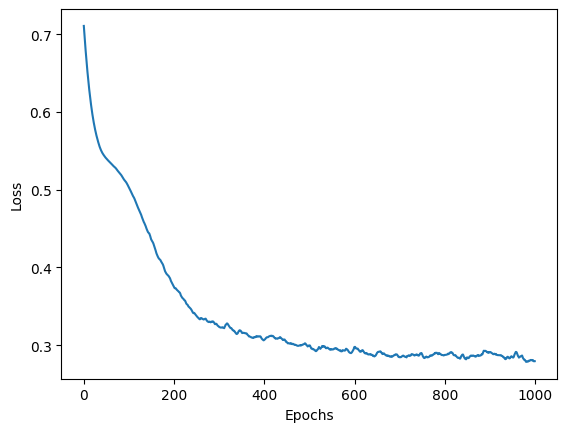

Training Losses are 
          0
0  0.851972
1  0.841197
2  0.830579
3  0.820238
4  0.810063
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2778  266]
 [ 244  712]]
Accuracy: 0.8725, Precision: 0.7280, Recall: 0.7448, F1-score: 0.7363

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2762  282]
 [ 242  714]]
Accuracy: 0.8690, Precision: 0.7169, Recall: 0.7469, F1-score: 0.7316



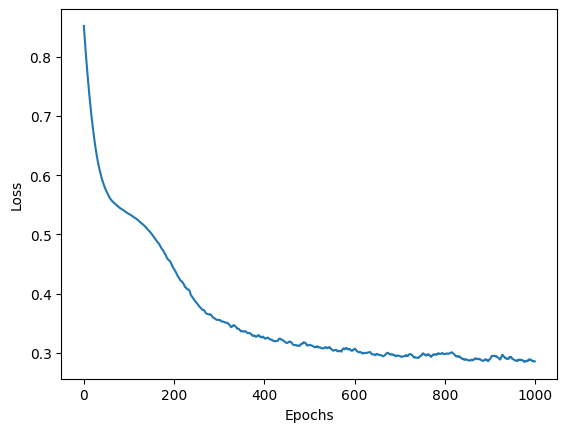

Training Losses are 
          0
0  0.687573
1  0.680752
2  0.674102
3  0.667490
4  0.661067
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2778  266]
 [ 260  696]]
Accuracy: 0.8685, Precision: 0.7235, Recall: 0.7280, F1-score: 0.7258

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2772  272]
 [ 259  697]]
Accuracy: 0.8672, Precision: 0.7193, Recall: 0.7291, F1-score: 0.7242



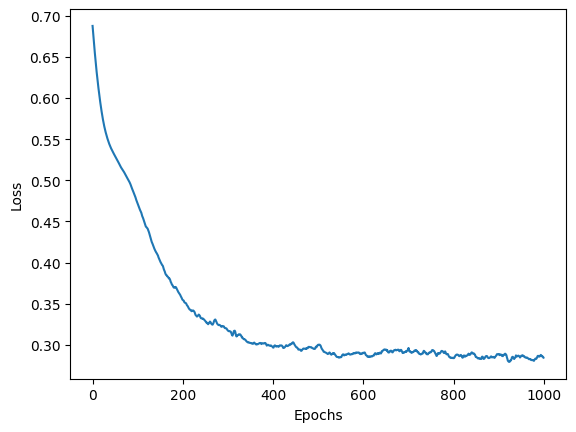

Training Losses are 
          0
0  0.669739
1  0.659603
2  0.650015
3  0.640949
4  0.632370
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2816  228]
 [ 317  639]]
Accuracy: 0.8638, Precision: 0.7370, Recall: 0.6684, F1-score: 0.7010

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2832  212]
 [ 305  651]]
Accuracy: 0.8708, Precision: 0.7543, Recall: 0.6810, F1-score: 0.7158



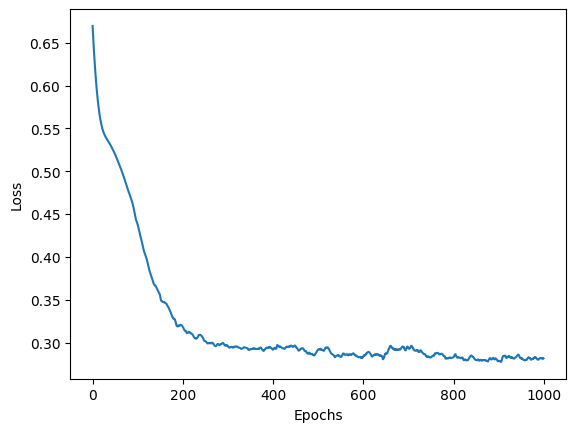

Training Losses are 
          0
0  0.772750
1  0.758567
2  0.745010
3  0.731986
4  0.719581
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2846  198]
 [ 316  640]]
Accuracy: 0.8715, Precision: 0.7637, Recall: 0.6695, F1-score: 0.7135

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2852  192]
 [ 315  641]]
Accuracy: 0.8732, Precision: 0.7695, Recall: 0.6705, F1-score: 0.7166



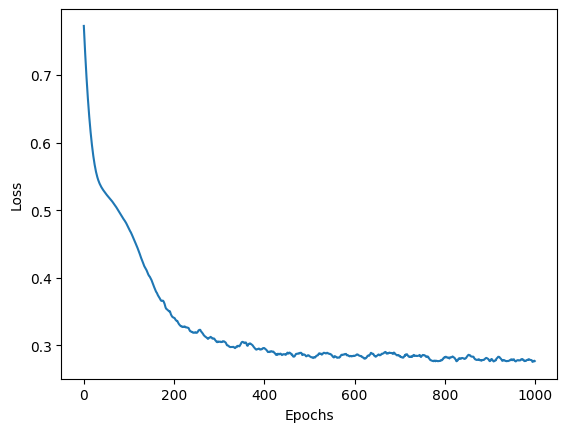

Training Losses are 
          0
0  0.713003
1  0.701538
2  0.690539
3  0.679938
4  0.669739
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2834  210]
 [ 313  643]]
Accuracy: 0.8692, Precision: 0.7538, Recall: 0.6726, F1-score: 0.7109

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2813  231]
 [ 302  654]]
Accuracy: 0.8668, Precision: 0.7390, Recall: 0.6841, F1-score: 0.7105



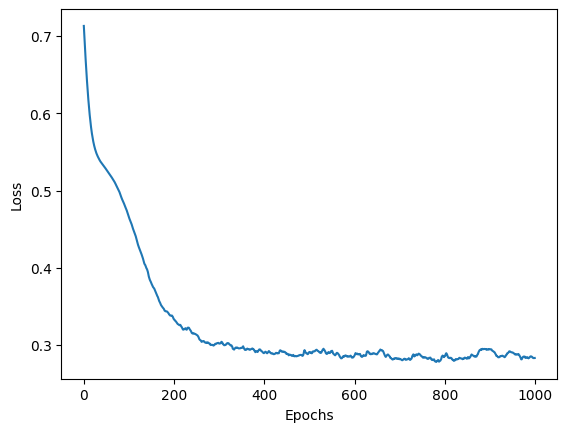

Training Losses are 
          0
0  0.680684
1  0.670783
2  0.661238
3  0.652161
4  0.643481
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2820  224]
 [ 302  654]]
Accuracy: 0.8685, Precision: 0.7449, Recall: 0.6841, F1-score: 0.7132

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2825  219]
 [ 305  651]]
Accuracy: 0.8690, Precision: 0.7483, Recall: 0.6810, F1-score: 0.7130



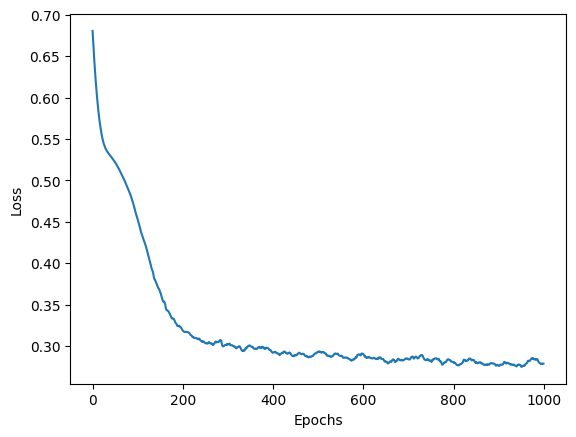

Training Losses are 
          0
0  0.723863
1  0.702090
2  0.681809
3  0.663149
4  0.646076
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2811  233]
 [ 290  666]]
Accuracy: 0.8692, Precision: 0.7408, Recall: 0.6967, F1-score: 0.7181

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2810  234]
 [ 308  648]]
Accuracy: 0.8645, Precision: 0.7347, Recall: 0.6778, F1-score: 0.7051



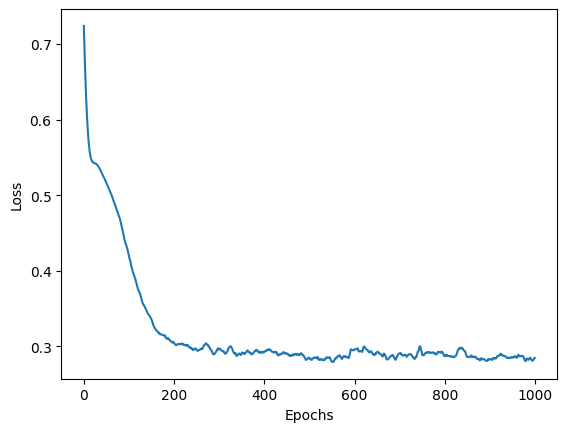

Training Losses are 
          0
0  0.694083
1  0.676372
2  0.659996
3  0.645000
4  0.631253
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2831  213]
 [ 308  648]]
Accuracy: 0.8698, Precision: 0.7526, Recall: 0.6778, F1-score: 0.7133

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2826  218]
 [ 318  638]]
Accuracy: 0.8660, Precision: 0.7453, Recall: 0.6674, F1-score: 0.7042



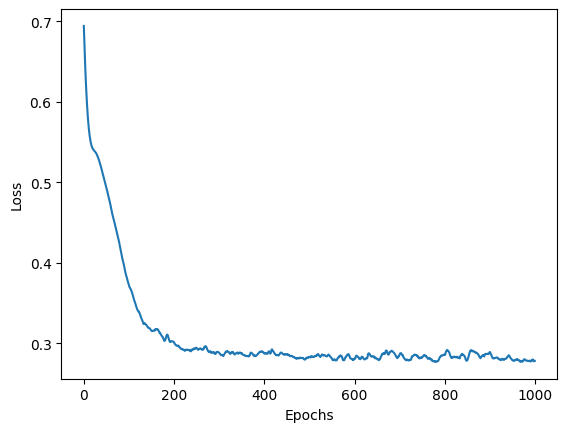

Training Losses are 
          0
0  0.632579
1  0.619070
2  0.606719
3  0.595657
4  0.585779
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2787  257]
 [ 273  683]]
Accuracy: 0.8675, Precision: 0.7266, Recall: 0.7144, F1-score: 0.7205

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2796  248]
 [ 279  677]]
Accuracy: 0.8682, Precision: 0.7319, Recall: 0.7082, F1-score: 0.7198



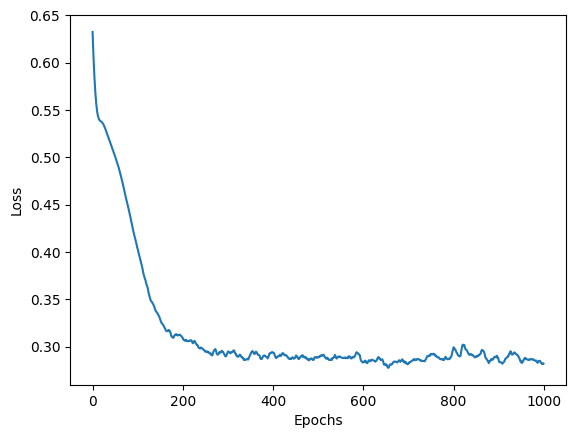

Training Losses are 
          0
0  0.628426
1  0.614573
2  0.602039
3  0.590812
4  0.580936
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2843  201]
 [ 320  636]]
Accuracy: 0.8698, Precision: 0.7599, Recall: 0.6653, F1-score: 0.7094

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2847  197]
 [ 333  623]]
Accuracy: 0.8675, Precision: 0.7598, Recall: 0.6517, F1-score: 0.7016



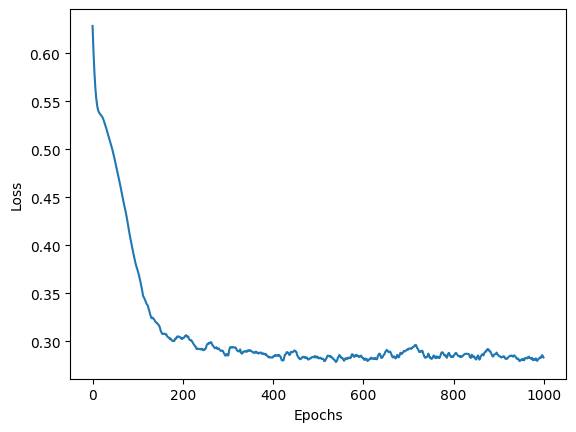

The best accuracy on test data is 0.87725 for layers 8 , 8, 16


In [27]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(50,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [11]:
print(X_training.shape)

(12000, 50)
